### CNN 실습 - dogs and cats 
출처: https://www.kaggle.com/c/dogs-vs-cats/data

In [78]:
import os 

path = "./data/train/"
os.listdir(path)

['cat', 'dog']

In [ ]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [ ]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline 

sample = random.choice(full_names) 
image = mpimg.imread(path+sample)
plt.imshow(image)
plt.show()

In [10]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape 

(333, 499, 3)

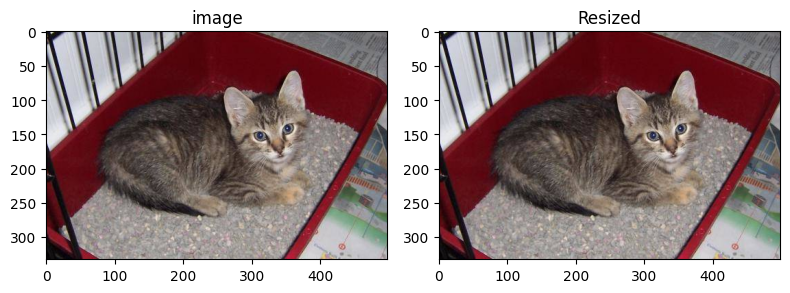

In [ ]:
from skimage.transform import resize 
resized = resize(image, (128,128, 3)) 

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()    # canvas 

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('image')
ax[1].imshow(image, cmap = plt.cm.gray)
ax[1].set_title('Resized')

fig.tight_layout()  # make interval narrowly 
plt.show()

### 사진 크기가 제각각이기 때문에 resize

In [13]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (32,32,3))) 

images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [24]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['cat', 'dog', 'dog'])

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, 
                                                    random_state=13, stratify=labels_encoded)
X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

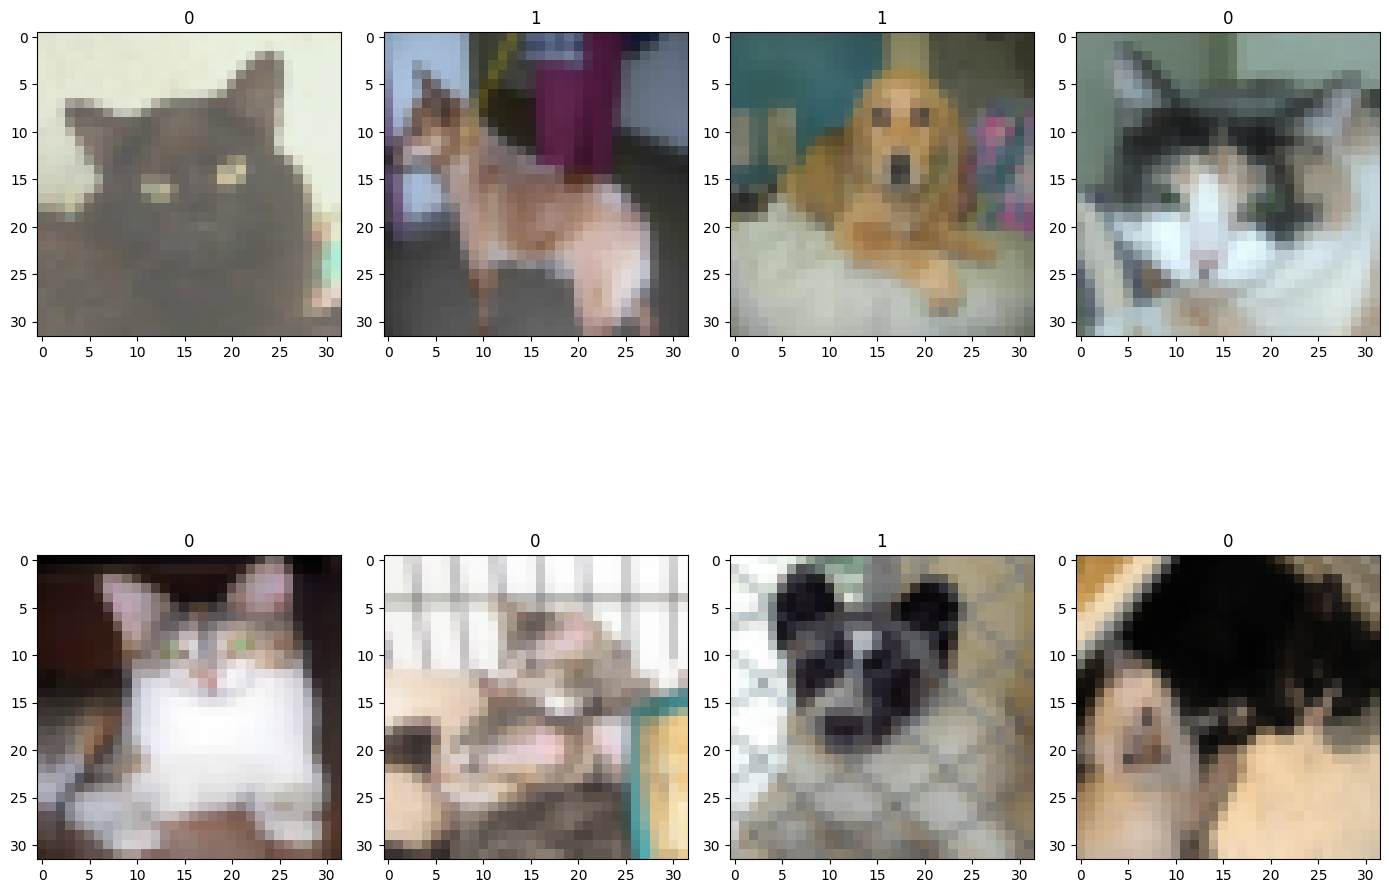

In [27]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2,4, idx+1)
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()


In [34]:
from tensorflow.keras import layers, models 

model = models.Sequential([
   layers.Conv2D( 32, kernel_size=(3,3), activation = 'relu',
                            input_shape=(32, 32, 3)),  
   layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
   layers.Dropout(0.25),

   layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Dropout(0.25),

   layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Dropout(0.25),

   layers.Flatten(),
   layers.Dense(512, activation='relu'),
   layers.Dropout(0.25),
   layers.Dense(2, activation='softmax')
])

/home/moon/venv/tensor/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile( optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
import time 

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 32,32, 3), y_train, 
                 epochs=10, 
                 verbose=1, validation_data=(X_test.reshape(5000, 32,32, 3), y_test))
print("fit time :", time.time() - start_time)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5816 - loss: 0.6664 - val_accuracy: 0.7034 - val_loss: 0.5917
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6962 - loss: 0.5814 - val_accuracy: 0.6960 - val_loss: 0.5711
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7295 - loss: 0.5392 - val_accuracy: 0.7406 - val_loss: 0.5309
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7456 - loss: 0.5137 - val_accuracy: 0.7650 - val_loss: 0.4827
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7603 - loss: 0.4898 - val_accuracy: 0.7676 - val_loss: 0.4870
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7671 - loss: 0.4818 - val_accuracy: 0.7744 - val_loss: 0.4601
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7783 - loss: 0.4626 - val_accuracy: 0.7792 - val_loss: 0.4500
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7823 - loss: 0.4520 - val_accuracy: 0.

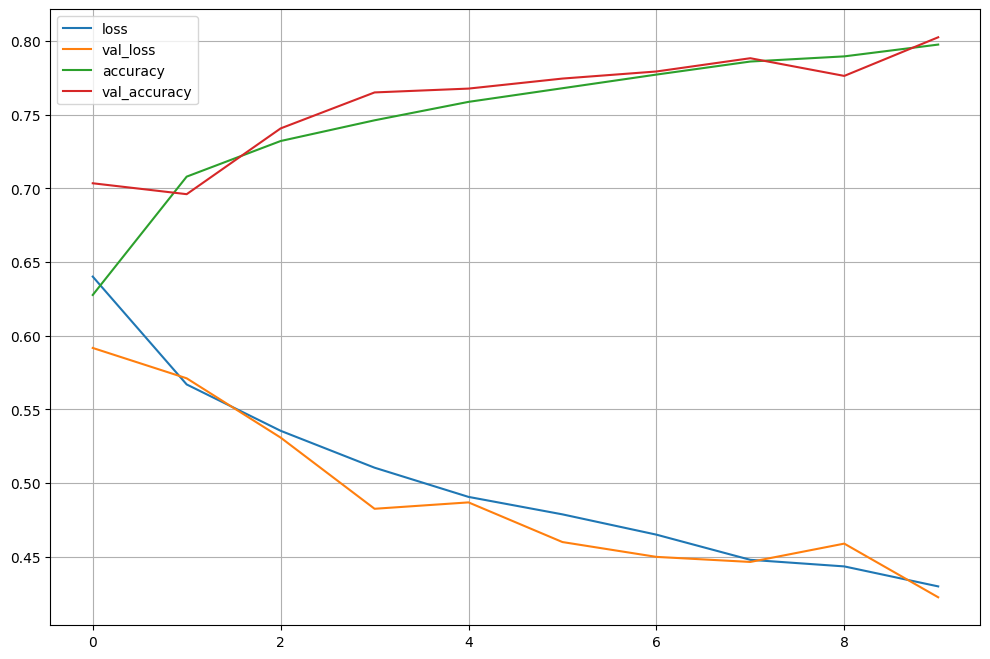

In [37]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [39]:
import os
import shutil 

path = "./data/train/"
classes = ['cat', 'dog']

for class_name in classes:
    class_path = os.path.join(path, class_name)
    os.makedirs(class_path, exist_ok=True)
    for file in full_names:
        if class_name in file:
            shutil.move(os.path.join(path, file), os.path.join(class_path, file))

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split = 0.2
)

In [45]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    path,
    target_size= (128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [46]:
validation_generator = datagen.flow_from_directory(
    path,
    target_size= (128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


In [47]:
model = models.Sequential([
   layers.Conv2D( 32, kernel_size=(3,3), activation = 'relu',
                            input_shape=(128, 128, 3)),  
   layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
   layers.Dropout(0.25),

   layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Dropout(0.25),

   layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Dropout(0.25),

   layers.Flatten(),
   layers.Dense(512, activation='relu'),
   layers.Dropout(0.25),
   layers.Dense(2, activation='softmax')
])

/home/moon/venv/tensor/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile( optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [49]:
model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5


/home/moon/venv/tensor/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.5445 - loss: 0.7329 - val_accuracy: 0.6961 - val_loss: 0.5650
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6999 - loss: 0.5612 - val_accuracy: 0.7384 - val_loss: 0.5133
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7584 - loss: 0.4895 - val_accuracy: 0.7776 - val_loss: 0.4733
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7969 - loss: 0.4335 - val_accuracy: 0.8101 - val_loss: 0.4243
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8227 - loss: 0.3925 - val_accuracy: 0.8217 - val_loss: 0.3945
